# Proyecto Final

### Cálculo y predicción de radiación solar en la tierra

### Herramientas computacionales (IMEC 3602)

Kevin González (201326605)

In [28]:
import datetime
import time
import os
import pandas as pd
%pylab inline
import numpy as np

def calculoPosicionSolar(latitud,longitud,GMT):
    solarAltitud = []
    solarAzimuth = []
    dia =0
    ##Se calculará para el día 22 de Mayo 2018 10:00 a.m.
    ### Tiempo que han pasado desde la noche del 1 Enero del 2000
    while dia<365:
        D = 5*366+(18-5)*365+(2)*31+28+30+21-0.5+((10-GMT)/24)+dia
    
    ### MEAN LONGITUDE of the sun
        q = 280.459+0.98564736*D
    ### MEAN ANOMALY of the sun
        g = 357.529 + 0.98560028*D
    
   
        while q >360:
            q = q-360
        while g >360:
            g = g-360

    ### LATITUD sol (Coordenadas elípticas)
        alpha_s = q + 1.915*np.sin(g) + 0.020*np.sin(2*g)
    
    ### AXIAL TILT
        epsilon = 23.429 - 0.00000036*D
    
    ### The Greewich Mean Sidereal Time (GMST)
        T = D/36525
        GMST = 18.697374558+ 24.06570982441908*(D) + 0.000026*(T**2)
        while GMST>24:
            GMST = GMST-24
            
    ### LOCAL MEAN SIDERIAL TIME
        tetha_L = GMST*15+longitud
        
        latitud_rad = np.deg2rad(latitud)
        longitud_rad = np.deg2rad(longitud)
        tetha_Lrad = np.deg2rad(tetha_L)
        alpha_srad = np.deg2rad(alpha_s)
        epsilon_rad = np.deg2rad(epsilon)
        
        num_tanA_s =(-np.sin(tetha_Lrad)*np.cos(alpha_srad)+np.cos(tetha_Lrad)*np.cos(epsilon_rad)*np.sin(alpha_srad))
        den_tanA_s =(-np.sin(latitud_rad)*np.cos(tetha_Lrad)*np.cos(alpha_srad)-(np.sin(latitud_rad)*np.sin(tetha_Lrad)*np.cos(epsilon_rad)-np.cos(latitud_rad)*np.sin(epsilon_rad))*np.sin(alpha_srad))
        sina_s = np.cos(latitud_rad)*np.cos(tetha_Lrad)*np.cos(alpha_srad)+(np.cos(latitud_rad)*np.sin(tetha_Lrad)*np.cos(epsilon_rad)+np.sin(latitud_rad)*np.sin(epsilon_rad))*np.sin(alpha_srad)
        tanA_s=num_tanA_s/den_tanA_s
        if num_tanA_s>0 and den_tanA_s>0:
            A_s = np.rad2deg(np.arctan(tanA_s))
        if num_tanA_s<0:
            A_s=np.rad2deg(np.arctan(tanA_s))+180
        if num_tanA_s>0 and den_tanA_s<0:
            A_s=np.rad2deg(np.arctan(tanA_s))+360
    ### SOLAR AZIMUTH
        solarAzimuth.append(A_s)
    ### SOLAR ALTITUDE
        a_s = np.rad2deg(np.arcsin(sina_s))
        solarAltitud.append(a_s)
        dia = dia+1
    return solarAzimuth,solarAltitud

def calculoPosicionSolarResolucionHora(latitud,longitud,GMT):
    solarAltitud = []
    solarAzimuth = []
    hora =0
    ##Se calculará para el día de hoy 22 de Mayo 2018 10:00 a.m.
    ### Tiempo que han pasado desde la noche del 1 Enero del 2000
    while hora<365*24:
        D = 5*366+(18-5)*365+(2)*31+28+30+21-0.5+((10-GMT)/24)+(hora/24)
    
    ### MEAN LONGITUDE of the sun
        q = 280.459+0.98564736*D
    ### MEAN ANOMALY of the sun
        g = 357.529 + 0.98560028*D
    
   
        while q >360:
            q = q-360
        while g >360:
            g = g-360

    ### LATITUD sol (Coordenadas elípticas)
        alpha_s = q + 1.915*np.sin(g) + 0.020*np.sin(2*g)
    
    ### AXIAL TILT
        epsilon = 23.429 - 0.00000036*D
    
    ### The Greewich Mean Sidereal Time (GMST)
        T = D/36525
        GMST = 18.697374558+ 24.06570982441908*(D) + 0.000026*(T**2)
        while GMST>24:
            GMST = GMST-24
            
    ### LOCAL MEAN SIDERIAL TIME
        tetha_L = GMST*15+longitud
        
        latitud_rad = np.deg2rad(latitud)
        longitud_rad = np.deg2rad(longitud)
        tetha_Lrad = np.deg2rad(tetha_L)
        alpha_srad = np.deg2rad(alpha_s)
        epsilon_rad = np.deg2rad(epsilon)
        
        num_tanA_s =(-np.sin(tetha_Lrad)*np.cos(alpha_srad)+np.cos(tetha_Lrad)*np.cos(epsilon_rad)*np.sin(alpha_srad))
        den_tanA_s =(-np.sin(latitud_rad)*np.cos(tetha_Lrad)*np.cos(alpha_srad)-(np.sin(latitud_rad)*np.sin(tetha_Lrad)*np.cos(epsilon_rad)-np.cos(latitud_rad)*np.sin(epsilon_rad))*np.sin(alpha_srad))
        sina_s = np.cos(latitud_rad)*np.cos(tetha_Lrad)*np.cos(alpha_srad)+(np.cos(latitud_rad)*np.sin(tetha_Lrad)*np.cos(epsilon_rad)+np.sin(latitud_rad)*np.sin(epsilon_rad))*np.sin(alpha_srad)
        tanA_s=num_tanA_s/den_tanA_s
        if num_tanA_s>0 and den_tanA_s>0:
            A_s = np.rad2deg(np.arctan(tanA_s))
        if num_tanA_s<0:
            A_s=np.rad2deg(np.arctan(tanA_s))+180
        if num_tanA_s>0 and den_tanA_s<0:
            A_s=np.rad2deg(np.arctan(tanA_s))+360
    ### SOLAR AZIMUTH
        solarAzimuth.append(A_s)
    ### SOLAR ALTITUDE
        a_s = np.rad2deg(np.arcsin(sina_s))
        solarAltitud.append(a_s)
        hora= hora+1
    return solarAzimuth,solarAltitud

Populating the interactive namespace from numpy and matplotlib


In [29]:
latitudBogota = -(4+(36/60)+(34/(60*60)))
longitudBogota= 74+(4/60)+(54/(60*60))
latitudMoscu = 55+(45/60)+(7/(60*60))
longitudMoscu = 37+(36/60)+(56/(60*60))
latitudJohannes = -26.2022705
longitudJohannes = 28.0436306

GMTBogota = -5
GMTMoscu = 3
GMTJohannes = 2
### Análisis para resolución horaria
resultadosBogotaHorario = calculoPosicionSolarResolucionHora(latitudBogota,longitudBogota,GMTBogota)
resultadosMoscuHorario = calculoPosicionSolarResolucionHora(latitudMoscu,longitudMoscu,GMTMoscu)
resultadosJohannesHorario = calculoPosicionSolarResolucionHora(latitudJohannes,longitudJohannes,GMTJohannes)

###SOLAR AZIMUTH and ALTITUD BOGOTÁ
solarAzimuthBogotaHorario = resultadosBogotaHorario[0]
solarAltitudBogotaHorario = resultadosBogotaHorario[1]

###SOLAR AZIMUTH and ALTITUD MOSCÚ
solarAzimuthMoscuHorario = resultadosMoscuHorario[0]
solarAltitudMoscuHorario = resultadosMoscuHorario[1]
###SOLAR AZIMUTH and ALTITUD JOHANNESBURGO
solarAzimuthJohannesHorario = resultadosJohannesHorario[0]
solarAltitudJohannesHorario = resultadosJohannesHorario[1]

### ANÁLISIS RESOLUCIÓN DÍA
resultadosBogota = calculoPosicionSolar(latitudBogota,longitudBogota,GMTBogota)
resultadosMoscu = calculoPosicionSolar(latitudMoscu,longitudMoscu,GMTMoscu)
resultadosJohannes = calculoPosicionSolar(latitudJohannes,longitudJohannes,GMTJohannes)

###SOLAR AZIMUTH and ALTITUD BOGOTÁ
solarAzimuthBogota = resultadosBogota[0]
solarAltitudBogota = resultadosBogota[1]

###SOLAR AZIMUTH and ALTITUD MOSCÚ
solarAzimuthMoscu = resultadosMoscu[0]
solarAltitudMoscu = resultadosMoscu[1]
###SOLAR AZIMUTH and ALTITUD JOHANNESBURGO
solarAzimuthJohannes = resultadosJohannes[0]
solarAltitudJohannes = resultadosJohannes[1]


### Direct Irradiance (kW/m^2) at a certain solar altitude (as) and altitude of the observer (h)
def directIrradiance(sunAltitud,h):
    Ie0 = 1361
    c=0.14
    sunAltitud_rad = np.deg2rad(sunAltitud)
    if(sunAltitud<0):
        I_edir=0
    else:
        AM = 1/(np.sin(sunAltitud_rad)+0.50572*((6.07995+sunAltitud))**(-1.6364))
        I_edir= Ie0*((1-c*h)*(0.7)**(AM**0.678)+c*h)
    return I_edir/1000

In [30]:
def irradianceProm(irradiance):
    n = 365
    suma = [0]*n
    prom = [0]*n
    j=0
    contador = 0
    for i in range(0,15):
        suma[0] = suma[0] + irradiance[i]
    while j<size(irradiance)-24:
        contador = contador + 1
        for i in range(15+j,39+j):
            suma[contador] = suma[contador] + irradiance[i]
        j+=24
    for i in range(0,365):
        prom[i] = suma[i]/24
    return prom

ValueError: x and y must have same first dimension, but have shapes (365,) and (8760,)

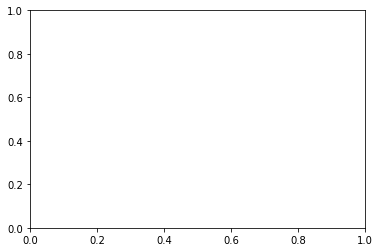

In [31]:
I_edirBog = []
I_edirMsk = []
I_edirJhs = []
horas = np.arange(1,365*24+1)
for i in range(0,size(solarAltitudBogotaHorario)):
    I_edirBog.append(directIrradiance(solarAltitudBogotaHorario[i],2600))
for i in range(0,size(solarAltitudMoscuHorario)):
    I_edirMsk.append(directIrradiance(solarAltitudMoscuHorario[i],156))
for i in range(0,size(solarAltitudJohannesHorario)):
    I_edirJhs.append(directIrradiance(solarAltitudJohannesHorario[i],1753))
    

plt.plot(dias,I_edirBog,label='Bogotá')
plt.xlabel('Hora')
plt.ylabel('Irradiación solar (kW/$m^2$)')
plt.plot(dias,I_edirMsk,label='Moscú')
plt.xlabel('Hora')
plt.ylabel('Irradiación solar (kW/$m^2$)')
plt.plot(dias,I_edirJhs,label='Johannesburgo')
plt.xlabel('Hora')
plt.ylabel('Irradiación solar (kW/$m^2$)')
plt.legend()

# MODELO MATEMÁTICO

Para la construcción del modelo se utilizó un modelo presente en la Universidad UT DELFT de Holanda. En él se introducen diversas teorías y aproximaciones, entre ellos el "Astronomical Applications Departement of the
U.S. Naval Observatory", el cual define el modelo que se utilizará más adelante. Las ecuaciónes utilizadas en el modelo fueron las siguientes:

* Días transcurridos desde la madrugada del 1 de Enero del 2000 UTC:


$ D:$ Tiempo transcurrido desde el 01/01/2000 UTC

* Longitud (q) y 'anomaly' (g) promedio del sol:

$q = 280.459º +0.98564736ºD$

$g = 357.529º +0.98560028ºD$

* Latitud del sol $\lambda_s$ en coordenadas elípiticas:

$ \lambda_s = q + 1.915ºsin g + 0.020º sin 2g $

* Inclinación axial de la tierra $\epsilon$:

$ \epsilon = 23.429-0.00000036ºD $

* Hora Greenwich (GMST):

$ T= D/36525 $

$ GMST = 18.697374558h + 24.06570982441908h*D + 0.000026h * T^2 $

* 'Local mean siderial time' $\theta_L$:

$ \alpha_0:$ Longitud del observador 

$ \theta_L = GMST * (15º/hour) + \alpha_0 $

* Altitud($a_s$) y 'azimuth'($A_s$) solar: 

$\phi_0 $ : Latitutd del observador
 
$a_s = arcsin( cos\phi_0cos\theta_L cos\alpha_s+(cos\phi_0sin\theta_Lcos\epsilon+sin\phi_0sin\epsilon)sin\lambda_s)$

$A_s = arctan\Big(\dfrac{-sin\theta_Lcos\lambda_s+cos\theta_Lcos\epsilon sin\lambda_s)}{-sin\phi_0cos\theta_Lcos\lambda_s-(sin\phi_0sin\theta_Lcos\epsilon-cos\phi_0sin\epsilon)sin\lambda_s}\Big) $

# RESTULADOS

Primeramente se calculó la posición solar en coordenadas elípticas para observar el comportamiento de la posición solar para la misma hora del día en diferentes días:

In [ ]:
pyplot.plot(solarAzimuthBogota[1:],solarAltitudBogota[1:])
pyplot.plot(solarAzimuthBogota[0],solarAltitudBogota[0],'k',marker='o', linestyle='dashed',linewidth=2, markersize=5)
pyplot.xlabel('Solar Azimuth[º]')
pyplot.ylabel('Solar Altitud[º]')
pyplot.title('Posoción solar alrededor del año [BOGOTÁ]')

In [ ]:
pyplot.plot(solarAzimuthMoscu,solarAltitudMoscu)
pyplot.xlabel('Solar Azimuth[º]')
pyplot.ylabel('Solar Altitud[º]')
pyplot.title('Posoción solar alrededor del año [MOSCÚ]')

In [ ]:
pyplot.plot(solarAzimuthJohannes,solarAltitudJohannes)
pyplot.xlabel('Solar Azimuth[º]')
pyplot.ylabel('Solar Altitud[º]')
pyplot.title('Posoción solar alrededor del año [JOHANNESBURGO]')
plt.tight_layout()

Se puede apreciar el analema el cual es esperado ya que este comportamiento describe la posición solar en el cielo si todos los días del año se observa a la misma hora del día.

Luego, se pudo calcular la radiación solar directa para cada uno de las ciudades (Bogotá, Moscú, Johanneburgo) y se pudo observar la incidencia de la ubicación sobre el modelo de radiación.

A continuación se muestra la radiación promedio diaria para cada una de las ciudades

In [ ]:
dias = np.arange(365)
plt.plot(dias,irradianceProm(I_edirBog))
plt.xlabel('Días')
plt.ylabel('Radiación solar promedio $W/m^2$')
plt.title('Radiación Solar promedio Bogotá')

Como se puede observar, la radiación promedio diaría para Bogotá varía entre 90 y 130 $W/m^2$

In [ ]:
plt.plot(dias,irradianceProm(I_edirMsk))
plt.xlabel('Días')
plt.ylabel('Radiación solar promedio $W/m^2$')
plt.title('Radiación Solar promedio Moscú')

Se puede ver que la radaición promedio en Moscú es mucho más baja que la de Bogotá y esto puede ser debido a que en Moscú puede existir épocas en el año donde se tenga pocas horas de sol en el día.

In [ ]:
plt.plot(dias,irradianceProm(I_edirJhs))
plt.xlabel('Días')
plt.ylabel('Radiación solar promedio W/m^2$')
plt.title('Radiación Solar promedio Johannesburgo')

Se puede observar que la radiación promedio en Johannesburgo varía un poco en 4 diferentes periodos de tiempo en valores entre los 70 y 90 $W/m^2$ aproximadamente

* Cabe mencionar que el modelo utilizado tiene en cuenta una aproximación de la cantidad de nubosidad presente en cada ubicación por lo que los resultados podrían variar considerablemente conforme a la realidad